In [20]:
import requests
import pandas as pd
import numpy as np
import matplotlib

In [6]:
response = requests.get('https://data.wprdc.org/data.json')
data_json = response.json()

items = [(d['title'], d['identifier'], d['publisher']['name'], len(d['distribution']), d['modified']) for d in data_json['dataset']]

with open('datasets.csv', 'w') as f:
    f.write('name,id,publisher,resources,modified\n')
    f.writelines([','.join([f'"{c}"' for c in row]) + '\n' for row in items])

In [13]:
df = pd.read_csv('datasets.csv', index_col='id', parse_dates=['modified'])
df

,name,publisher,resources,modified
id,,,,
ea85f4b5-0b95-41b8-86ee-f1e6d16fc409,Allegheny County Election Results,Allegheny County,50,2023-02-24 16:01:31.534837
ac32c80c-de99-4444-a9a8-48c0515ac7bb,Aggregated Parking Transactions,Pittsburgh Parking Authority,4,2023-02-24 16:00:47.151932
c7b3266c-adc6-41c0-b19a-8d4353bfcdaf,Allegheny County Air Quality,Allegheny County,13,2023-02-24 15:23:15.976454
5b0b8acc-d8fc-4278-bc57-684e2e4faab5,Daily Community Center Attendance,City of Pittsburgh,2,2023-02-24 12:56:22.799704
1d38b5ef-fa53-4c15-9a50-905d4d573292,Pittsburgh Parking Meters and Payment Points,Pittsburgh Parking Authority,3,2023-02-24 12:56:20.849207
...,...,...,...,...
f7ccd6d1-b38e-4b08-aba1-b78b4e9483ca,Allegheny County 2000/2010 Census Tract Relati...,University of Pittsburgh,10,2020-04-02 17:00:28.425397
d0b56030-3391-49db-87bd-4f1c16490fbc,Snow Plow Activity (2018-2020),City of Pittsburgh,31,2020-02-23 03:31:38.286670
e87ccf87-90f6-4023-ba4e-5a2f58793a72,Parking Purchases (Beta),Pittsburgh Parking Authority,5,2019-11-20 15:40:15.244247


In [17]:
df.describe()

,resources
count,332.000000
mean,6.569277
std,13.761829
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,190.000000


In [19]:
df.modified.describe(datetime_is_numeric=True)

count                              332
mean     2022-05-30 09:21:51.010395648
min         2019-06-12 13:04:19.018189
25%      2021-12-16 14:12:35.859509760
50%      2022-10-20 14:56:43.432669952
75%      2023-02-11 20:05:09.156225024
max         2023-02-24 16:01:31.534837
Name: modified, dtype: object

### Distribution of Dataset "Sizes" (# of resources)

In [48]:
df['resources'].mean(), df['resources'].std()

(6.569277108433735, 13.761828927417703)

In [49]:
df['resources'].mean() + 3 * df['resources']

id
ea85f4b5-0b95-41b8-86ee-f1e6d16fc409    156.569277
ac32c80c-de99-4444-a9a8-48c0515ac7bb     18.569277
c7b3266c-adc6-41c0-b19a-8d4353bfcdaf     45.569277
5b0b8acc-d8fc-4278-bc57-684e2e4faab5     12.569277
1d38b5ef-fa53-4c15-9a50-905d4d573292     15.569277
                                           ...    
f7ccd6d1-b38e-4b08-aba1-b78b4e9483ca     36.569277
d0b56030-3391-49db-87bd-4f1c16490fbc     99.569277
e87ccf87-90f6-4023-ba4e-5a2f58793a72     21.569277
30bbb37c-ca2d-47e6-bae4-72c57272383c     15.569277
9bec1794-2606-4666-81f0-3d38e148f40f     54.569277
Name: resources, Length: 332, dtype: float64

<AxesSubplot: ylabel='Frequency'>

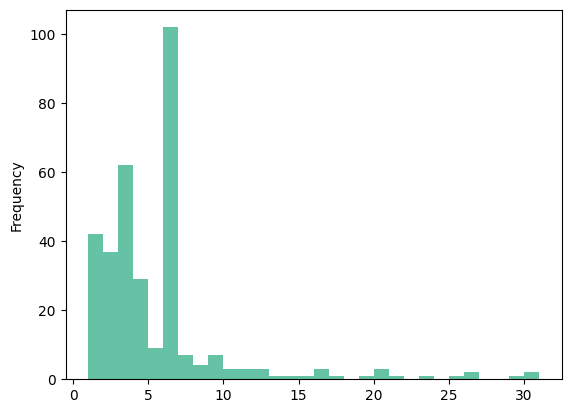

In [50]:
df[df['resources'] < df['resources'].mean() + 2 * df['resources'].std()]['resources'].plot.hist(bins=30, colormap='Set2')

In [51]:
data_json

{'conformsTo': 'https://project-open-data.cio.gov/v1.1/schema',
 'describedBy': 'https://project-open-data.cio.gov/v1.1/schema/catalog.json',
 '@context': 'https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld',
 '@type': 'dcat:Catalog',
 'dataset': [{'@type': 'dcat:Dataset',
   'title': 'Allegheny County Election Results',
   'description': 'Official, certified results of primary, general, and special elections held in Allegheny County. (Note that the most recent results may not yet be certified. Please check the link at https://www.alleghenycounty.us/elections/election-results.aspx to determine whether the results have been certified.)',
   'modified': '2023-02-24T16:01:31.534837',
   'accessLevel': 'public',
   'identifier': 'ea85f4b5-0b95-41b8-86ee-f1e6d16fc409',
   'publisher': {'@type': 'org:Organization', 'name': 'Allegheny County'},
   'contactPoint': {'@type': 'vcard:Contact',
    'fn': 'Liz Dell',
    'hasEmail': 'mailto:Elizabeth.Dell@AlleghenyCounty.us'},
   'distrib